In [89]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting

# Graph Laplacian

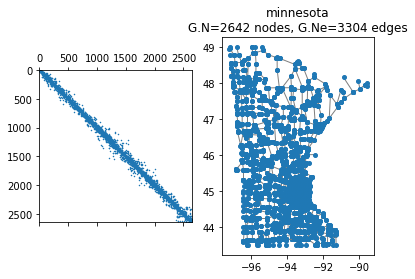

In [90]:
## Real Network
G = graphs.Minnesota()
G.coords.shape # coordinates are already set for nodes for visualisation
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(G.W, markersize=0.5) # visualise the adjacency matrix in a spy plot
G.plot(ax=axes[1]) # visualise the graph in 2D coordinates

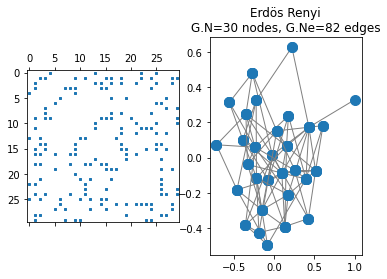

In [91]:
## Random Network
G = graphs.ErdosRenyi(N=30, p=0.2)
G.set_coordinates(kind='spring') # set coordinates for nodes for visualisation
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(G.W, markersize=2)
G.plot(ax=axes[1])

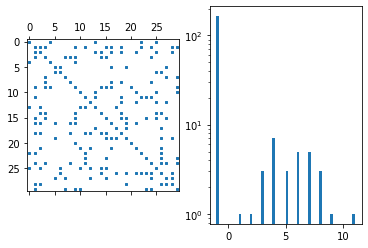

In [92]:
G.compute_laplacian('combinatorial')
fig, axes = plt.subplots(1, 2)
axes[0].spy(G.L, markersize=2)
axes[1].hist(G.L.data, bins=50, log=True);

In [93]:
G.L.data

array([ 4., -1., -1., -1., -1., 11., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  8., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  7., -1., -1., -1., -1., -1., -1., -1.,  2., -1.,  4., -1.,
       -1., -1., -1., -1.,  3., -1., -1., -1.,  3., -1., -1., -1.,  4.,
       -1., -1., -1., -1., -1., -1.,  8., -1., -1., -1., -1., -1.,  4.,
       -1., -1., -1., -1., -1.,  6., -1., -1., -1., -1., -1.,  4., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  5., -1., -1., -1., -1.,  6.,
       -1., -1., -1., -1., -1., -1.,  8., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  7., -1., -1., -1.,  3., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  7., -1., -1., -1., -1.,  6., -1., -1.,
       -1.,  1., -1., -1., -1., -1.,  5., -1., -1., -1., -1.,  4., -1.,
       -1., -1.,  4., -1., -1., -1., -1., -1., -1.,  7., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  7., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  9., -1., -1., -1., -1., -1., -1.,  6., -1

- The combinatorial Laplacian contains the degree of every node in the spy plot
- The histogram represent both the number of edges (number of -1) and the distribution of noe degrees (values superior to zero)

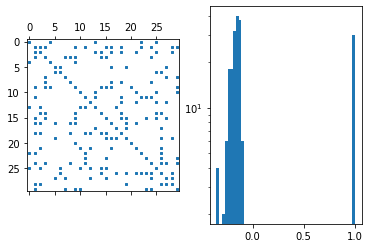

In [94]:
G.compute_laplacian('normalized')
fig, axes = plt.subplots(1, 2)
axes[0].spy(G.L, markersize=2)
axes[1].hist(G.L.data, bins=50, log=True);

- The Lplacian include node degrees
- In this setting, the node degree are normalized and the edge weights as well ($-w_{i,j} / \sqrt( d_{i} d_{j} )$), the later distribution is plotted on the histogram

# Graph Signal

C:\Users\Pierre Osselin\miniconda3\envs\cdt_lab_env\lib\site-packages\pygsp\plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


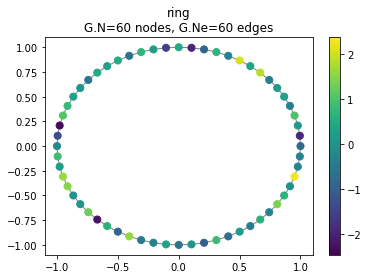

In [95]:
G = graphs.Ring(N=60)
f = np.random.normal(size=G.N)
G.plot_signal(f, vertex_size=50)

Initial f : 129.01679529298315
Sorted f : 22.011328895982103
Plot Sorted signal:


C:\Users\Pierre Osselin\miniconda3\envs\cdt_lab_env\lib\site-packages\pygsp\plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


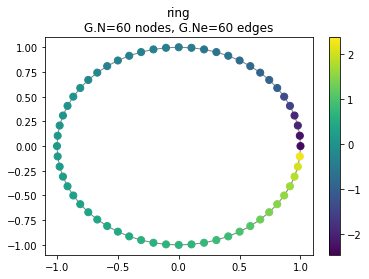

In [96]:
G.compute_laplacian('combinatorial')
# Quadratic Form Comparison
print("Initial f :", f.dot(G.L.dot(f)))
sorted_f = np.sort(f)
print("Sorted f :", sorted_f.dot(G.L.dot(sorted_f)))
print("Plot Sorted signal:")
G.plot_signal(sorted_f, vertex_size=50)

- The sorted vector make the graph smoother
- On a ring the nodes are ordered as well, on an arbitrary graph the edge presense can be heterogeneous accross node index

# Fourier Basis

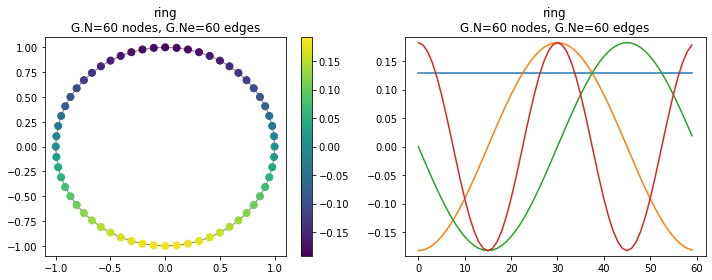

In [97]:
G.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(G.U[:, 2], vertex_size=50, ax=axes[0]) # the 3rd eigenvector as a signal on the graph
G.set_coordinates('line1D')
G.plot_signal(G.U[:, 0:4], ax=axes[1]) # the first three eigenvectors on the real line
fig.tight_layout()

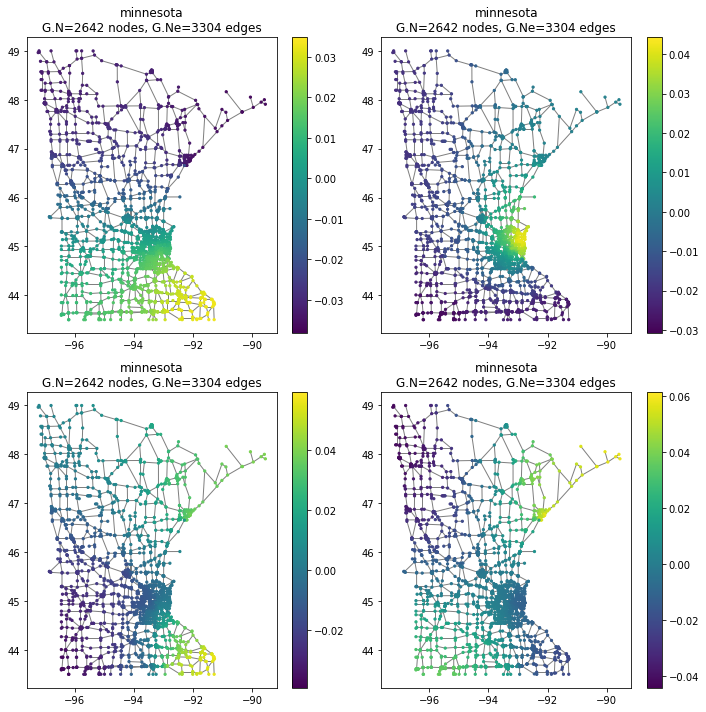

In [98]:
## Network Minesota
G = graphs.Grid2d(10, 10)
G = graphs.Minnesota()
G.compute_fourier_basis()
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
G.plot_signal(G.U[:, 1], vertex_size=5, ax=axes[0,0]) # the 3rd eigenvector as a signal on the graph
G.plot_signal(G.U[:, 2], vertex_size=5, ax=axes[0,1]) # the 3rd eigenvector as a signal on the graph
G.plot_signal(G.U[:, 3], vertex_size=5, ax=axes[1,0]) # the 3rd eigenvector as a signal on the graph
G.plot_signal(G.U[:, 4], vertex_size=5, ax=axes[1,1]) # the 3rd eigenvector as a signal on the graph

fig.tight_layout()

- Observe periodicity

In [99]:
G.compute_laplacian('combinatorial')
# Quadratic Form Comparison
for i in range(5):
    print("Quadratic Form {} th eigenvector : {}".format(i, G.U[:, i].dot(G.L.dot(G.U[:, i]))))

Quadratic Form 0 th eigenvector : -2.699938276758027e-19
Quadratic Form 1 th eigenvector : 0.0008437341541295234
Quadratic Form 2 th eigenvector : 0.002075820193504406
Quadratic Form 3 th eigenvector : 0.002264807598352882
Quadratic Form 4 th eigenvector : 0.0031235829129347545


- Smoothness decrease

- The evaluation of the Quadratic Form increases with the eigenvectors due to their increasing frequency

# Graph Fourier transform (GFT)

2020-10-21 14:53:41,806:[INFO](pygsp.graphs.community.__init__): Constructed using eps-NN with eps = 2.5900200641113513


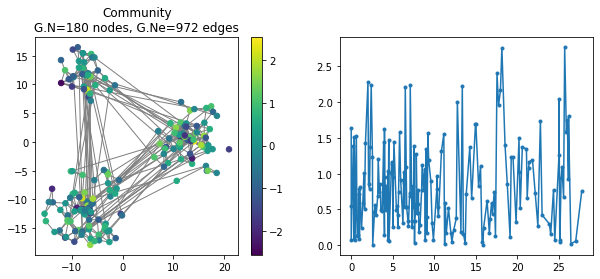

In [100]:
communities = [40, 80, 60]
G = graphs.Community(N=180, Nc=3, comm_sizes=communities)
f = np.random.normal(size=G.N)
G.compute_fourier_basis()
f_hat = G.gft(f)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(f, vertex_size=30, ax=axes[0])
axes[1].plot(G.e, np.abs(f_hat), '.-')

- Clearly random vector hence not smooth and presence of high frequency

In [101]:
fp = np.zeros(G.N)
fp[:communities[0]] = -1 * np.ones(communities[0])
fp[-communities[-1]:] = 1 * np.ones(communities[-1])

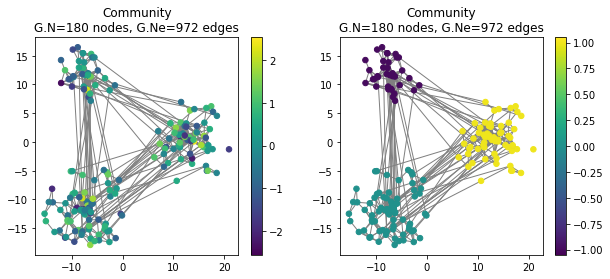

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(f, vertex_size=30, ax=axes[0])
G.plot_signal(fp, vertex_size=30, ax=axes[1])

In [103]:
fp_hat = G.gft(fp)

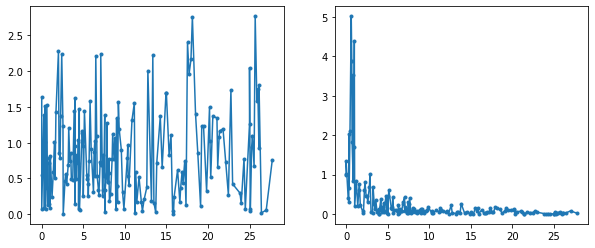

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(G.e, np.abs(f_hat), '.-')
axes[1].plot(G.e, np.abs(fp_hat), '.-')

- Far Smoother encapsulated in the frequency plot

In [105]:
G.compute_laplacian('combinatorial')
# Quadratic Form Comparison
print("Quadratic Form for f : {}".format((f.dot(G.L.dot(f))) / np.sum(f**2)))
print("Quadratic Form for fp : {}".format((fp.dot(G.L.dot(fp))) / np.sum(fp**2)))

Quadratic Form for f : 12.311434786162737
Quadratic Form for fp : 0.99


---- Checkpoint

# Filtering

In [106]:
import copy
fb_hat = copy.deepcopy(f_hat)
fb_hat[10:] = 0 # this corresponds to an ideal brick-wall low-pass filtering
fb = G.igft(fb_hat)

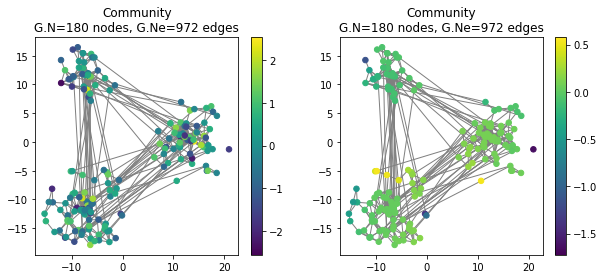

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(f, vertex_size=30, ax=axes[0])
G.plot_signal(fb, vertex_size=30, ax=axes[1])

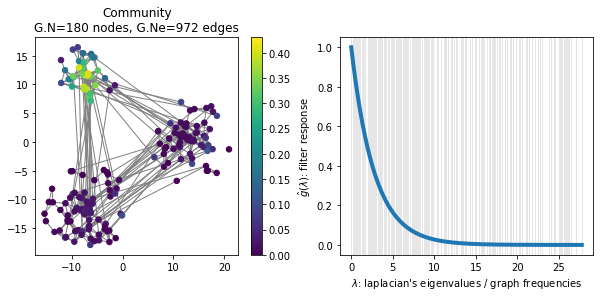

In [108]:
tau = 10
delta = 10
g = filters.Heat(G, tau) # the heat kernel defined via the graph spectral domain
s = g.localize(delta) # the heat kernel localised at a particular node in the vertex domain
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(s, vertex_size=30, ax=axes[0])
g.plot(ax=axes[1])

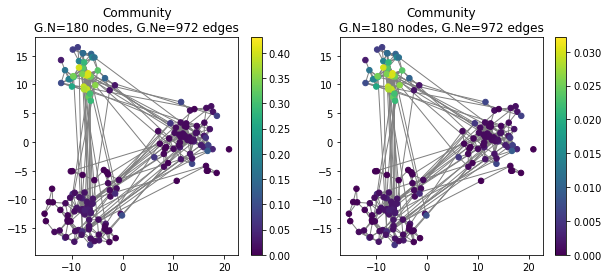

In [112]:
## Filter on Delta Function
f_kronecker = np.zeros(180)
f_kronecker[delta] = 1
f_kronecker_h = g.filter(f_kronecker)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(s, vertex_size=30, ax=axes[0])
G.plot_signal(f_kronecker_h, vertex_size=30, ax=axes[1])

In [109]:
fh = g.filter(f)

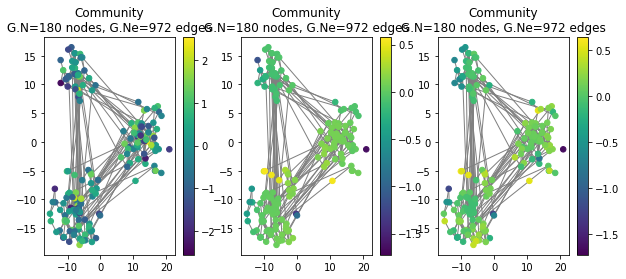

In [113]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
G.plot_signal(f, vertex_size=30, ax=axes[0])
G.plot_signal(fb, vertex_size=30, ax=axes[1])
G.plot_signal(fh, vertex_size=30, ax=axes[2])

- Brick / Heat Very similar, a little less smooth for the Heat

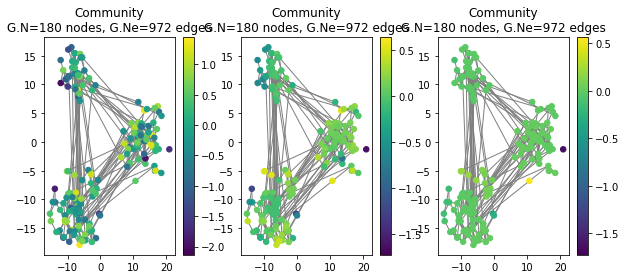

In [114]:
delta = 10
g1 = filters.Heat(G, 1) # the heat kernel defined via the graph spectral domain
g2 = filters.Heat(G, 10) # the heat kernel defined via the graph spectral domain
g3 = filters.Heat(G, 100) # the heat kernel defined via the graph spectral domain

s1 = g1.localize(delta) # the heat kernel localised at a particular node in the vertex domain
s2 = g2.localize(delta) # the heat kernel localised at a particular node in the vertex domain
s3 = g3.localize(delta) # the heat kernel localised at a particular node in the vertex domain

fh1 = g1.filter(f)
fh2 = g2.filter(f)
fh3 = g3.filter(f)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
G.plot_signal(fh1, vertex_size=30, ax=axes[0])
G.plot_signal(fh2, vertex_size=30, ax=axes[1])
G.plot_signal(fh3, vertex_size=30, ax=axes[2])

In [ ]:
g = filters.Filter(G, lambda x: 1. / (1. + x))

# Denoising

- Equivqlent to dividing by the inverse of eigenvalues spectrum

C:\Users\Pierre Osselin\miniconda3\envs\cdt_lab_env\lib\site-packages\pygsp\plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


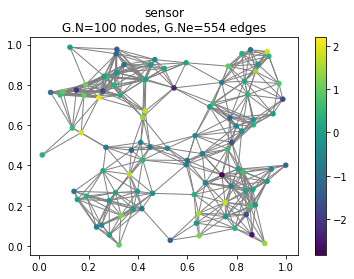

In [179]:
G = graphs.Sensor(N=100)
f = np.random.normal(size=G.N)
G.plot_signal(f, vertex_size=20)

In [180]:
G.compute_laplacian('combinatorial')

In [181]:
G.compute_fourier_basis()
f_smooth = G.U[:, 1] + G.U[:, 2] + G.U[:, 3] + G.U[:, 4]

C:\Users\Pierre Osselin\miniconda3\envs\cdt_lab_env\lib\site-packages\pygsp\plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


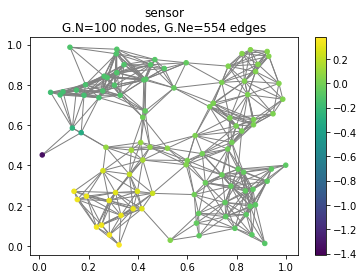

In [182]:
G.plot_signal(f_smooth, vertex_size=20)

In [183]:
std = 0.15
noise = std * np.random.normal(size=G.N)

In [184]:
f_noisy = f_smooth + noise

C:\Users\Pierre Osselin\miniconda3\envs\cdt_lab_env\lib\site-packages\pygsp\plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


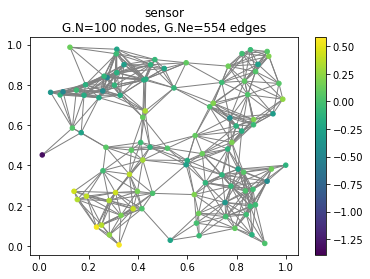

In [185]:
G.plot_signal(f_noisy, vertex_size=20)

In [186]:
alpha = 1.

In [187]:
f_denoised = np.linalg.solve((np.eye(G.N) + alpha*G.L), f_noisy)

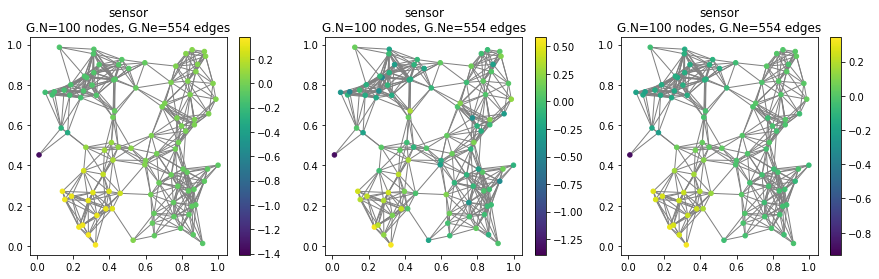

In [188]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
G.plot_signal(f_smooth, vertex_size=20, ax=axes[0])
G.plot_signal(f_noisy, vertex_size=20, ax=axes[1])
G.plot_signal(f_denoised, vertex_size=20, ax=axes[2])

In [189]:
## Search for alpha
def objective(alpha):
    alpha = alpha[0]
    f_denoised = np.linalg.solve((np.eye(G.N) + alpha*G.L), f_noisy)
    return np.sum((f_smooth - f_denoised)**2)

In [190]:
from scipy.optimize import minimize

In [191]:
result = minimize(objective, [1.], bounds = [(0.0001, 100)])

In [192]:
result

      fun: 0.3100048545691035
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.68514114e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.53973883])

In [193]:
f_denoised = np.linalg.solve((np.eye(G.N) + result["x"][0]*G.L), f_noisy)

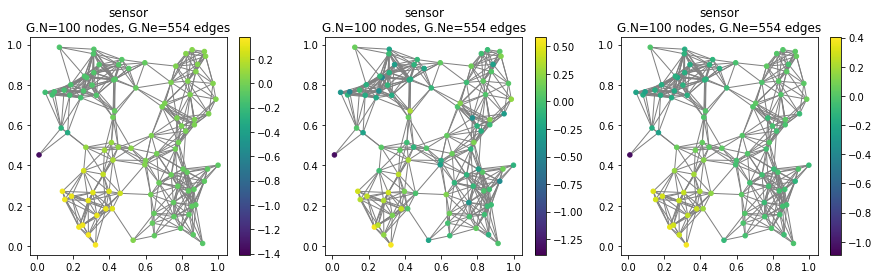

In [194]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
G.plot_signal(f_smooth, vertex_size=20, ax=axes[0])
G.plot_signal(f_noisy, vertex_size=20, ax=axes[1])
G.plot_signal(f_denoised, vertex_size=20, ax=axes[2])

In [162]:
objective([1])

0.23422902127648842